In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
#path = "../../../Google Drive/Data_science/NYU/Machine Learning/ML Project (Collisions)/" #Joe
path = "../../../../Google Drive/ML Project (Collisions)/" # Joyce
# path = "" # Lucas

In [3]:
with open(path+"data_for_training/v4/collisions_1hot.pkl", 'rb') as infile:
    df = pickle.load(infile)

In [4]:
view_date = pd.to_datetime(df['date_time'])

train_indices = (0, np.sum(view_date < datetime.date(2015,9,12))-1)
val_indices = (train_indices[1]+1,\
               train_indices[1] + \
               np.sum((view_date >= datetime.date(2015,9,12)) & (view_date < datetime.date(2016,7,31))))
test_indices = (val_indices[1]+1,\
               val_indices[1] + np.sum(view_date >= datetime.date(2016,7,31)))

In [5]:
X_train = df.drop(['injured_or_killed'], axis=1).iloc[train_indices[0]:train_indices[1]]
y_train = df['injured_or_killed'].iloc[train_indices[0]:train_indices[1]]
X_val = df.drop(['injured_or_killed'], axis=1).iloc[val_indices[0]:val_indices[1]]
y_val = df['injured_or_killed'][val_indices[0]:val_indices[1]]
X_test = df.drop(['injured_or_killed'], axis=1).iloc[test_indices[0]:test_indices[1]]
y_test = df['injured_or_killed'][test_indices[0]:test_indices[1]]

In [6]:
df['date_time'] = pd.to_datetime(df.date_time).dt.date

In [7]:
df

,date_time,zip_code,latitude,longitude,congestion/gridlock_0.001,chronic_speeding_0.001,drag_racing_0.001,chronic_stoplight_violation_0.001,truck_route_violation_0.001,congestion/gridlock_0.002,...,vehicle_type_code_4_unknown,vehicle_type_code_5_ambulance,vehicle_type_code_5_bicycle,vehicle_type_code_5_large_vehicle,vehicle_type_code_5_medium_vehicle,vehicle_type_code_5_motorcycle,vehicle_type_code_5_other,vehicle_type_code_5_passenger_vehicle,vehicle_type_code_5_small_com_veh(4_tires),vehicle_type_code_5_unknown
UNIQUE KEY,,,,,,,,,,,,,,,,,,,,,
37632,2012-07-01,10036.0,40.762127,-73.997387,72.000000,0.000000,0.000000,1.000000,0.000000,112.000000,...,0,0,0,0,0,0,0,0,0,0
2999940,2012-07-01,11207.0,40.697753,-73.813916,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0,0,0,0,0,0,0,0,0,0
3044659,2012-07-01,11207.0,40.733610,-73.923840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
116256,2012-07-01,11223.0,40.588868,-73.972745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
175808,2012-07-01,11215.0,40.677406,-73.983048,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
2836632,2012-07-01,11207.0,40.720963,-73.918860,1.661921,0.069656,0.027191,0.136273,0.067579,3.289125,...,0,0,0,0,0,0,0,0,0,0
78654,2012-07-01,10451.0,40.824188,-73.913840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
125655,2012-07-01,11234.0,40.607179,-73.916414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
264072,2012-07-01,11375.0,40.732979,-73.844348,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0


In [8]:
sums = pd.DataFrame(df.groupby('date_time')['injured_or_killed'].sum())
sums.reset_index(inplace=True)
sums.date_time = pd.to_datetime(sums.date_time)
sums.set_index('date_time', inplace=True)
sums.rename(columns={'injured_or_killed': 'sum'}, inplace = True)

counts = pd.DataFrame(df.groupby('date_time')['injured_or_killed'].count())
counts.reset_index(inplace=True)
counts.date_time = pd.to_datetime(counts.date_time)
counts.set_index('date_time', inplace=True)
counts.rename(columns={'injured_or_killed': 'total'}, inplace = True)

macro = sums.join(counts)

In [9]:
macro['injury_killed_rate'] = macro['sum']/macro['total']

In [10]:
import calmap

//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


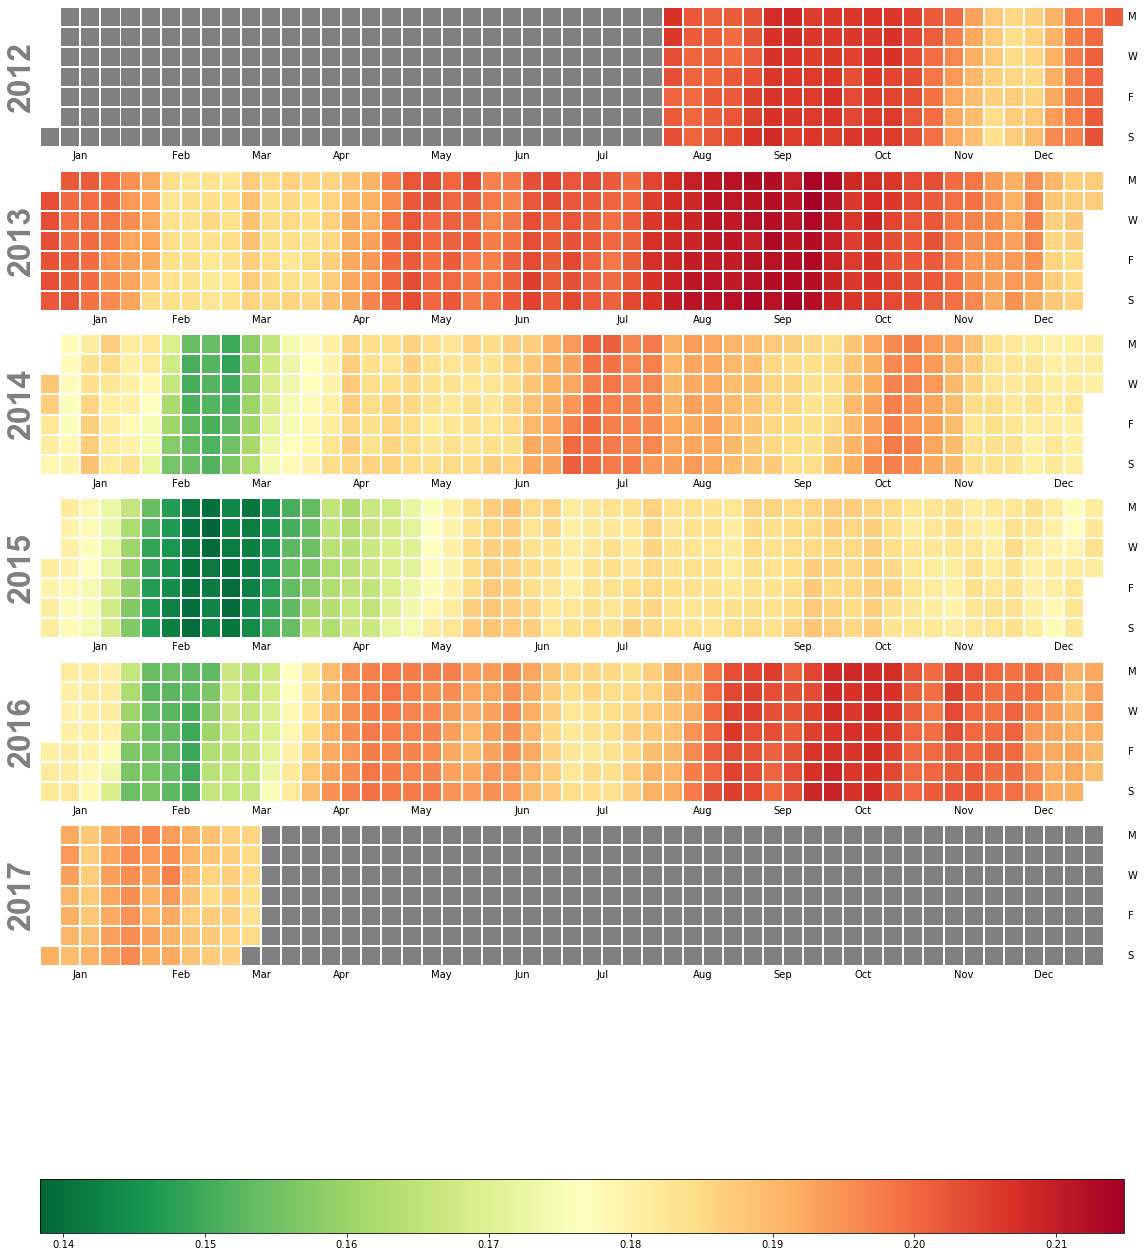

In [12]:
macro['rolling'] = macro.injury_killed_rate.rolling(30).mean()
fig,ax= calmap.calendarplot(macro['rolling'], daylabels='MTWTFSS', dayticks=[0, 2, 4, 6]\
                   , fig_kws = {'figsize': (16, 20)}, fillcolor='grey', cmap = 'RdYlGn_r')

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), orientation='horizontal')

In [ ]:
macro.loc['2015-02-20']

In [ ]:
macro.loc['2013-08-20']